In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("Assignment3-Credit-Card-Interest.csv")


In [5]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,Female,29,RG277,Salaried,X1,26,No,302875,No,0
1,BHYZRTQT,Female,47,RG276,Self_Employed,X1,15,No,645552,Yes,0
2,6STHBLXU,Male,44,RG283,Self_Employed,X3,85,No,725777,Yes,0
3,KVFKFAM7,Male,77,RG268,Other,X3,49,No,2297704,Yes,0
4,RMCZIYYW,Female,84,RG279,Other,X2,93,No,555199,No,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196580 entries, 0 to 196579
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   196580 non-null  object
 1   Gender               196580 non-null  object
 2   Age                  196580 non-null  int64 
 3   Region_Code          196580 non-null  object
 4   Occupation           196580 non-null  object
 5   Channel_Code         196580 non-null  object
 6   Vintage              196580 non-null  int64 
 7   Credit_Product       173216 non-null  object
 8   Avg_Account_Balance  196580 non-null  int64 
 9   Is_Active            196580 non-null  object
 10  Is_Lead              196580 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 16.5+ MB


In [7]:
enc = preprocessing.LabelEncoder()
data['Gender'] = enc.fit_transform(data['Gender'])
data['Occupation'] = enc.fit_transform(data['Occupation'])
data['Region_Code'] = enc.fit_transform(data['Region_Code'])
data['Channel_Code'] = enc.fit_transform(data['Channel_Code'])
data['Credit_Product'] = enc.fit_transform(data['Credit_Product'])
data['Is_Active'] = enc.fit_transform(data['Is_Active'])

In [8]:

data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,SCVAQHXI,0,29,27,2,0,26,0,302875,0,0
1,BHYZRTQT,0,47,26,3,0,15,0,645552,1,0
2,6STHBLXU,1,44,33,3,2,85,0,725777,1,0
3,KVFKFAM7,1,77,18,1,2,49,0,2297704,1,0
4,RMCZIYYW,0,84,29,1,1,93,0,555199,0,1


In [9]:
col_null = [col for col in data.columns if data[col].isna().any()]
print(col_null)

[]


In [10]:
for column in data:
    if data[column].dtypes != object:
      q1 = data[column].quantile(.25)
      q3 = data[column].quantile(.75)
      iqr = q3 - q1

      lowerfence = q1 - 1.5 * iqr
      upperfence = q3 - 1.5 * iqr

      total = data[column].between(lowerfence, upperfence).sum()
      print(column + ":", end = " ")
      print(total)

Gender: 0
Age: 0
Region_Code: 6723
Occupation: 2110
Channel_Code: 0
Vintage: 0
Credit_Product: 0
Avg_Account_Balance: 1641
Is_Active: 0
Is_Lead: 150003


In [11]:
data.describe()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,196580.000000,1.965800e+05,196580.000000,196580.000000
mean,0.546602,43.873812,19.891016,2.103062,0.904110,47.038422,0.531672,1.128338e+06,0.388849,0.236937
std,0.497825,14.833586,10.866952,0.853904,0.885141,32.397558,0.697642,8.524013e+05,0.487490,0.425204
min,0.000000,23.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.079000e+04,0.000000,0.000000
25%,0.000000,30.000000,11.000000,1.000000,0.000000,20.000000,0.000000,6.041320e+05,0.000000,0.000000
50%,1.000000,43.000000,19.000000,2.000000,1.000000,32.000000,0.000000,8.942495e+05,0.000000,0.000000
75%,1.000000,54.000000,30.000000,3.000000,2.000000,74.000000,1.000000,1.366154e+06,1.000000,0.000000
max,1.000000,85.000000,34.000000,3.000000,3.000000,135.000000,2.000000,1.035201e+07,1.000000,1.000000


In [12]:
numerical = ['Region_Code', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead']

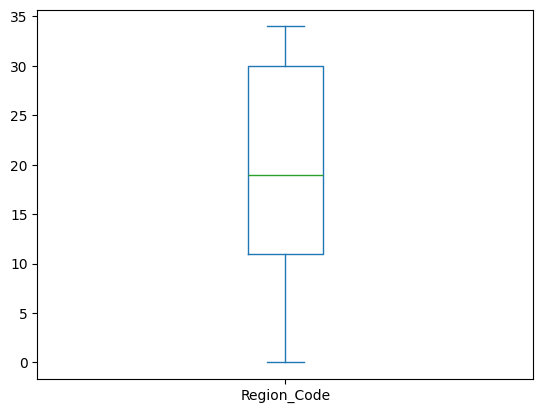

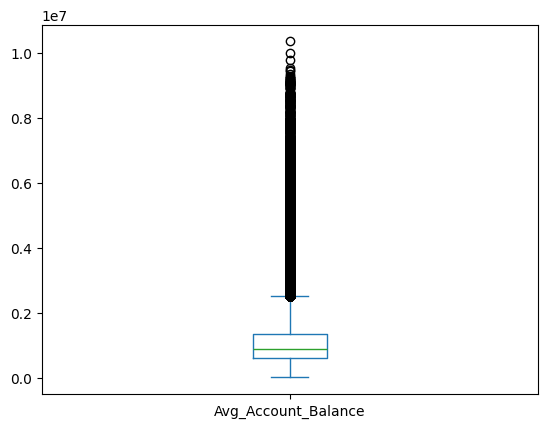

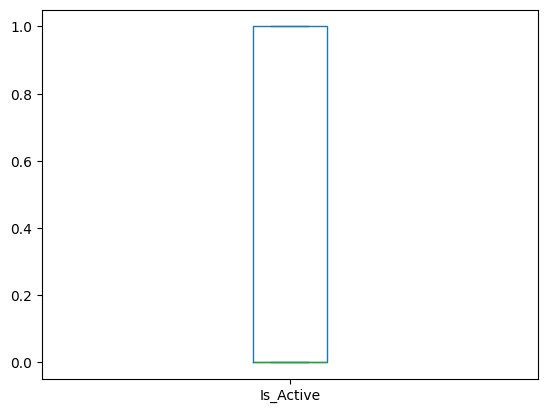

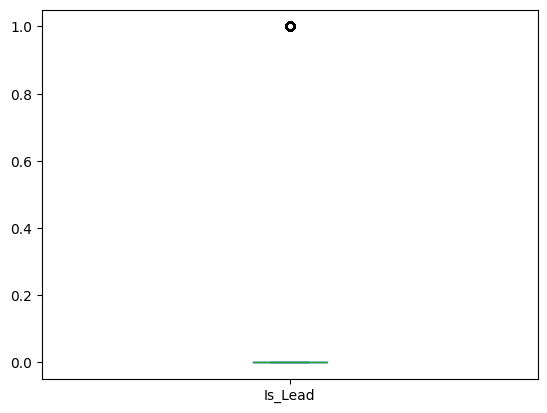

In [13]:
for num in numerical:
  ax = data[num].plot(kind = 'box')
  plt.show()

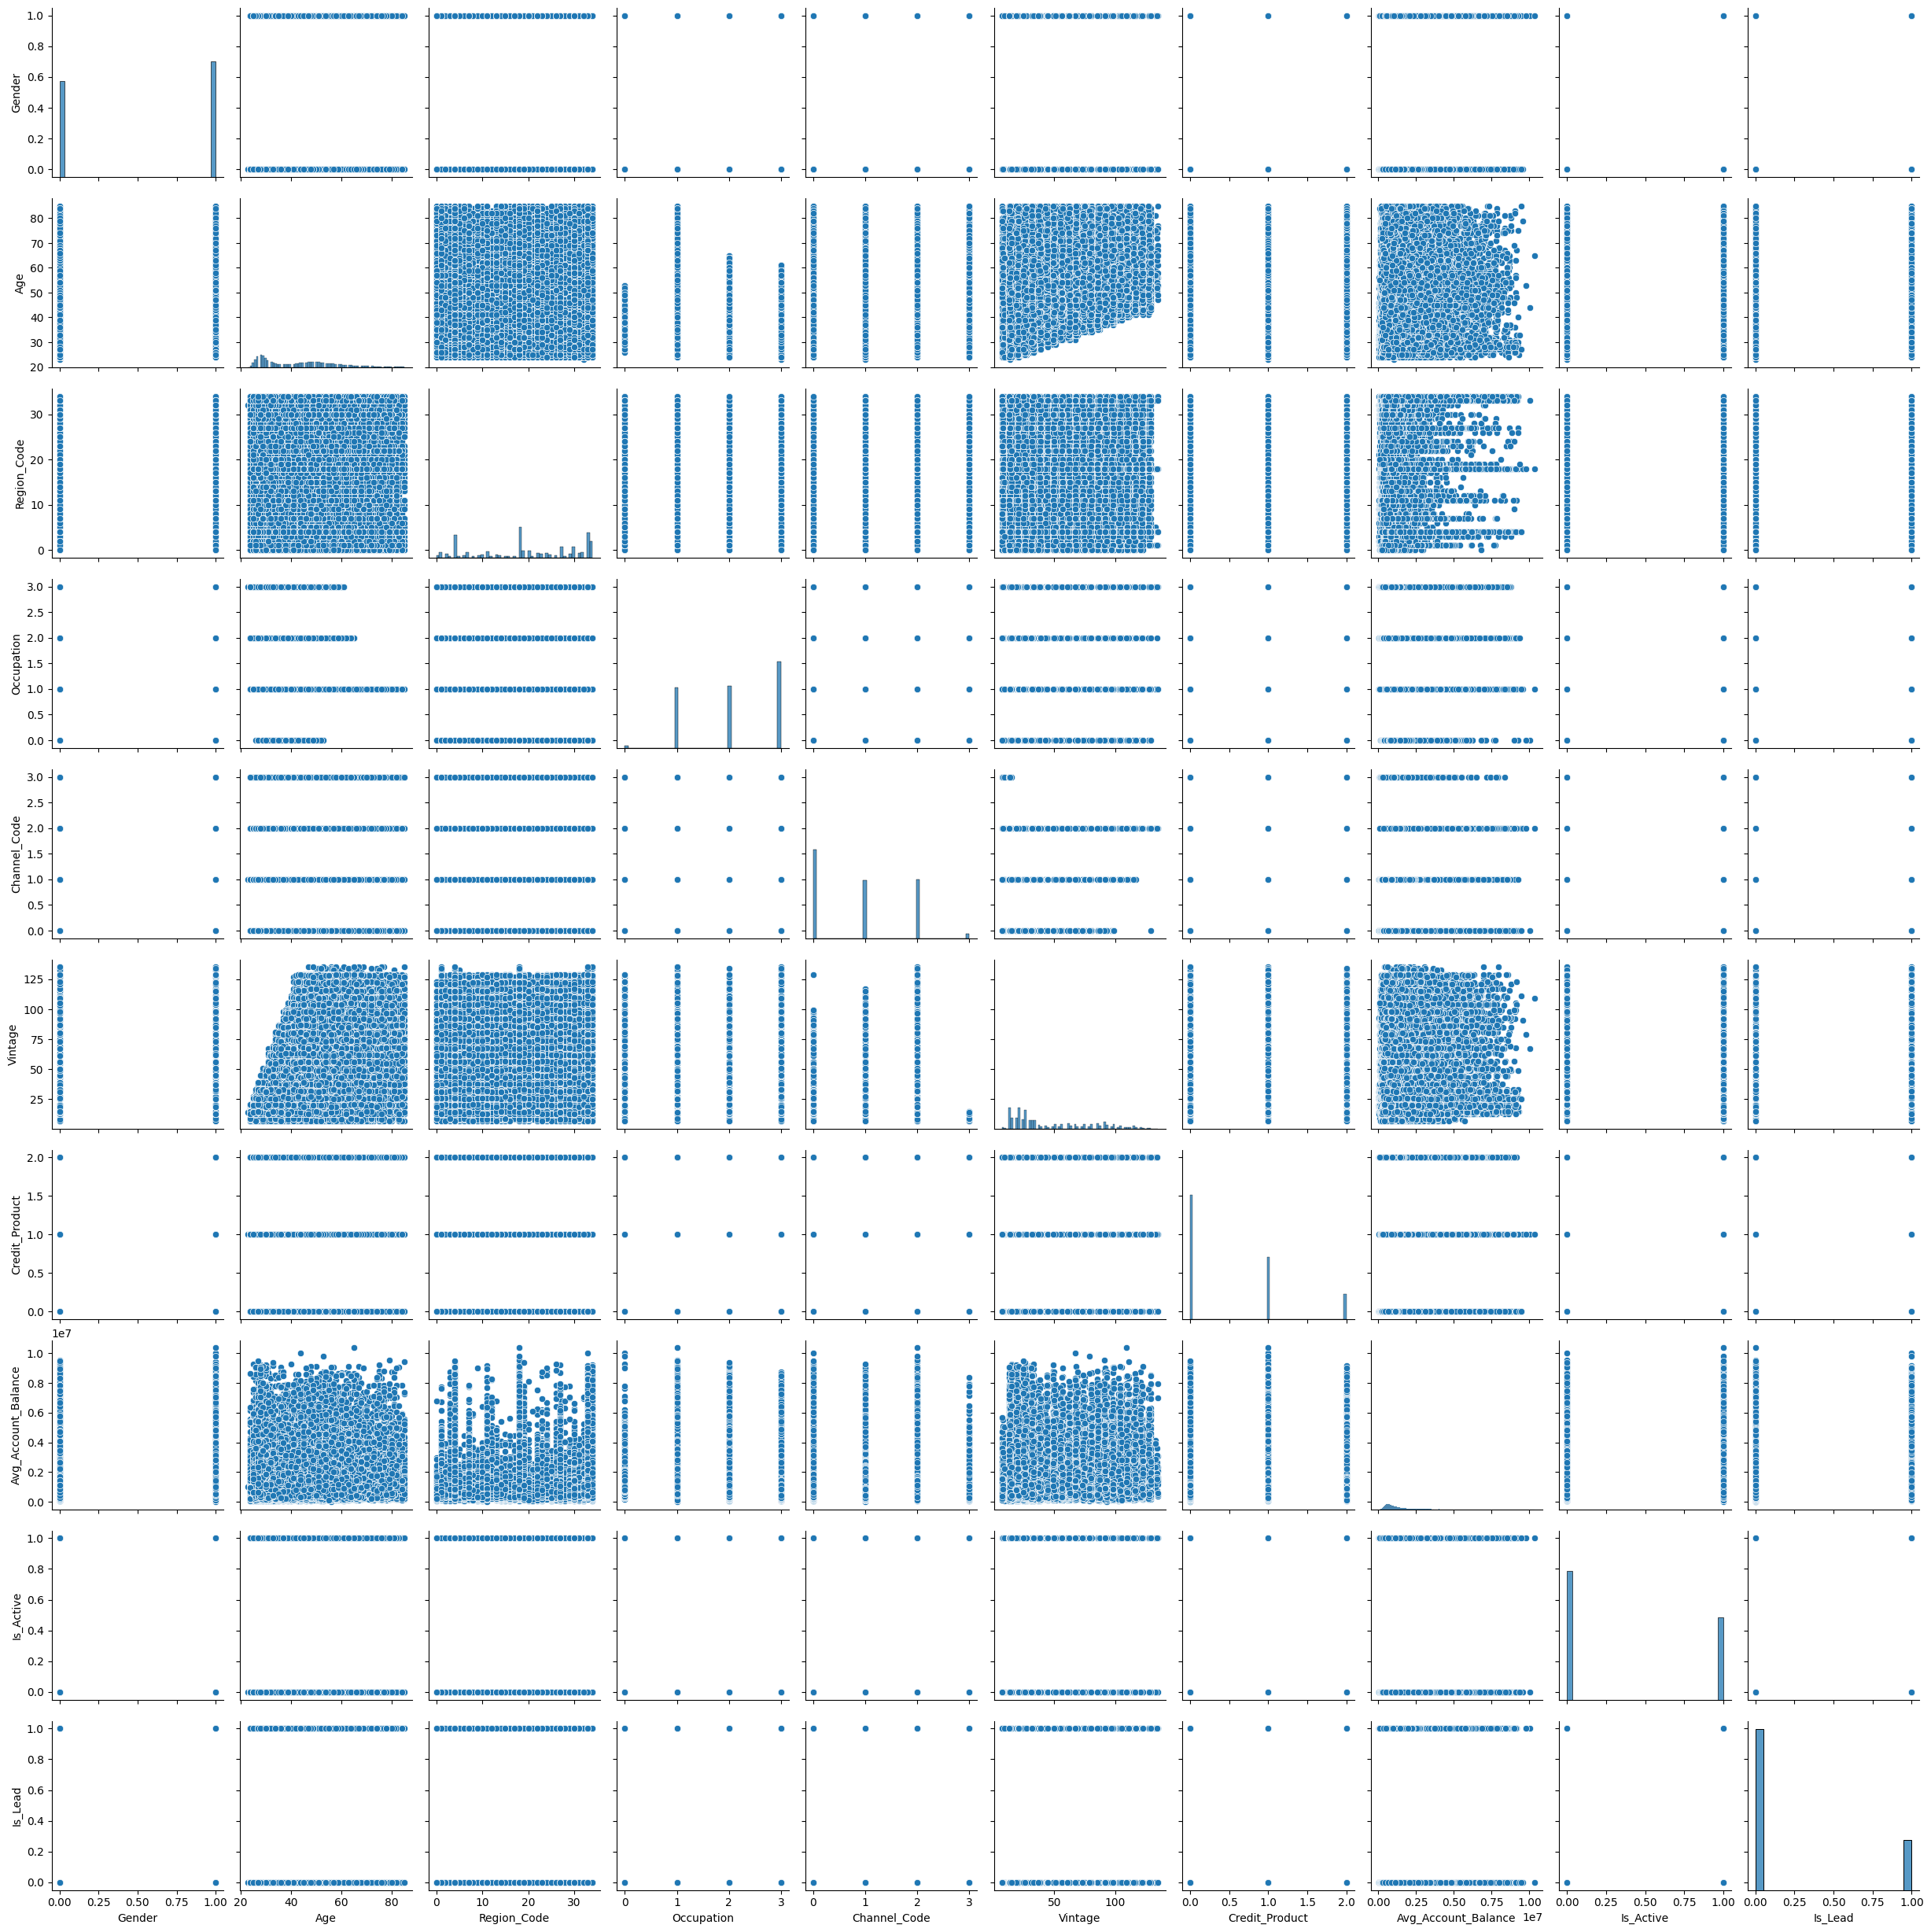

In [14]:
sb.pairplot(data)

In [15]:
data = data.drop(columns = 'ID')

<Axes: >

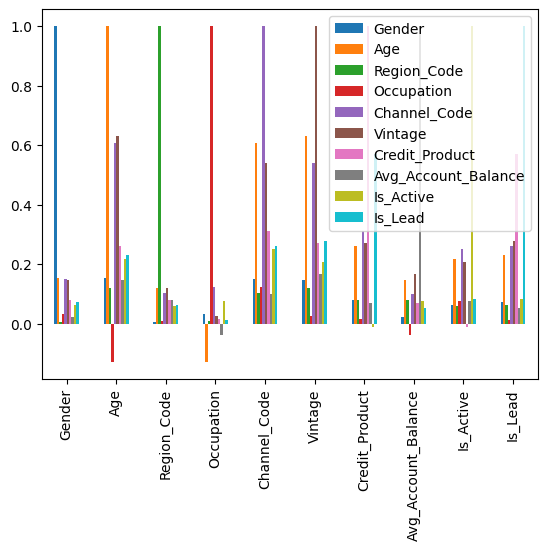

In [16]:
corr_data = data.corr()
corr_data.plot.bar()

In [17]:
X = data.drop(columns=['Is_Lead'])  
Y = data['Is_Lead']  


XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)


In [18]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [19]:
model = LinearRegression().fit(XTrain , YTrain)
prediction = model.predict(XTest)

In [20]:
lgr = LogisticRegression().fit(XTrain, YTrain)
predictLGR = lgr.predict(XTest)

print(classification_report(YTest, predictLGR))
print(classification_report(YTrain, lgr.predict(XTrain)))

c:\Users\gil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.78      0.97      0.87     30090
           1       0.54      0.13      0.21      9226

    accuracy                           0.77     39316
   macro avg       0.66      0.55      0.54     39316
weighted avg       0.73      0.77      0.71     39316

              precision    recall  f1-score   support

           0       0.78      0.96      0.86    119913
           1       0.56      0.14      0.23     37351

    accuracy                           0.77    157264
   macro avg       0.67      0.55      0.55    157264
weighted avg       0.73      0.77      0.71    157264



In [21]:
from sklearn.svm import SVC

In [22]:
SVM = SVC().fit(XTrain, YTrain)
CTest = SVM.predict(XTest)
CTrain = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.762494913012514
Test set acc:  0.7653372672703225


In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(YTest, CTest)
precision = precision_score(YTest, CTest)
recall = recall_score(YTest, CTest)
print(f1)
print(precision)
print(recall)

0.0
0.0
0.0


c:\Users\gil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")  

# Train the model
rf_model.fit(XTrain, YTrain)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = rf_model.predict(XTest)
print(classification_report(YTest, y_pred))
print("Accuracy:", metrics.accuracy_score(YTest, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     30090
           1       0.75      0.55      0.64      9226

    accuracy                           0.85     39316
   macro avg       0.81      0.75      0.77     39316
weighted avg       0.84      0.85      0.84     39316

Accuracy: 0.8509003967850239


Normalize data

In [27]:
normalized = data.copy()
normalized["Is_Lead"] = (normalized["Is_Lead"] - normalized["Is_Lead"].min() / normalized["Is_Lead"].max() - normalized["Is_Lead"].min())
normalized["Is_Lead"] = (normalized["Is_Lead"] - normalized["Is_Lead"].min() / normalized["Is_Lead"].max() - normalized["Is_Lead"].min())

In [28]:

X = data.drop(columns=['Is_Lead'])  
y = data['Is_Lead']  

nXTrain, nXTest, nYTrain, nYTest = train_test_split(X, y, test_size=0.2, random_state=42)

print(nXTrain.columns)

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')


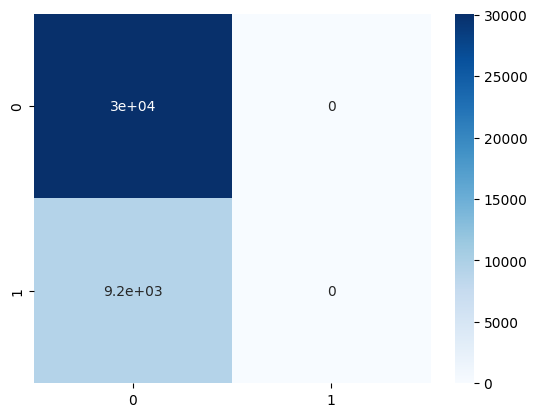

In [29]:
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap = "Blues", annot = True)
plt.show()

In [30]:
lgr = LogisticRegression().fit(nXTrain, nYTrain)
npredictLGR = lgr.predict(nXTest)

print(classification_report(nYTest, npredictLGR))
print(classification_report(nYTrain, lgr.predict(nXTrain)))

c:\Users\gil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.78      0.96      0.86     29908
           1       0.56      0.15      0.23      9408

    accuracy                           0.77     39316
   macro avg       0.67      0.55      0.55     39316
weighted avg       0.73      0.77      0.71     39316

              precision    recall  f1-score   support

           0       0.79      0.96      0.87    120095
           1       0.55      0.15      0.24     37169

    accuracy                           0.77    157264
   macro avg       0.67      0.56      0.55    157264
weighted avg       0.73      0.77      0.72    157264



In [31]:
SVM = SVC().fit(nXTrain, nYTrain)
nCTest = SVM.predict(nXTest)
nCTrain = SVM.predict(nXTrain)
print("Train set acc: ", metrics.accuracy_score(nYTrain, nCTrain))
print("Test set acc: ", metrics.accuracy_score(nYTest, nCTest))

Train set acc:  0.7636522026655814
Test set acc:  0.7607081086580527


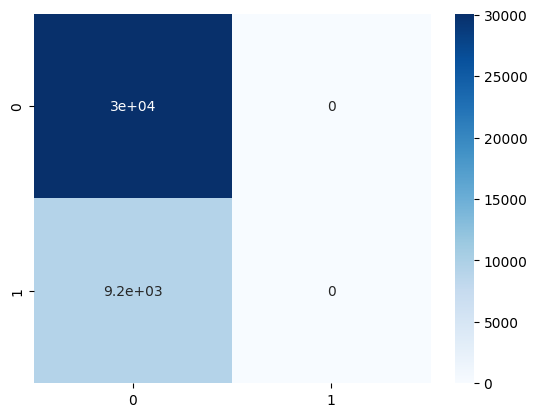

In [32]:
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap = "Blues", annot = True)
plt.show()


from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(YTest, CTest)
precision = precision_score(YTest, CTest)
recall = recall_score(YTest, CTest)
print(f1)
print(precision)
print(recall)

In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(nYTest, nCTest)
precision = precision_score(nYTest, nCTest)
recall = recall_score(nYTest, nCTest)
print(f1)
print(precision)
print(recall)

0.0
0.0
0.0


c:\Users\gil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")  

# Train the model
rf_model.fit(nXTrain, nYTrain)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
ny_pred = rf_model.predict(nXTest)
print(classification_report(nYTest, ny_pred))
print("Accuracy:", metrics.accuracy_score(nYTest, ny_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     29908
           1       0.76      0.56      0.65      9408

    accuracy                           0.85     39316
   macro avg       0.82      0.75      0.78     39316
weighted avg       0.85      0.85      0.84     39316

Accuracy: 0.8521975785939566


In [36]:
print(nXTrain.columns) 

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')
